<a href="https://colab.research.google.com/github/Keerthanabellam/dm-1/blob/main/prog_ass_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.c    
• How many unique items are there in your dataset?

• How many records are there in your dataset?


• What is the most popular item in your dataset? How many transactions contain this item?

In [ ]:
import pandas as pd
df = pd.read_csv('Grocery_Items_2.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
df = pd.read_csv('Grocery_Items_2.csv')
all_items = df.melt(var_name="transaction", value_name="item")['item']
all_items = all_items.dropna()
unique_items_count = all_items.nunique()
print(f"Number of unique items: {unique_items_count}")
total_records = len(df)
print(f"Number of records : {total_records}")
most_popular_item = all_items.value_counts().idxmax()
most_popular_item_count = all_items.value_counts().max()
print(f"Most popular item: {most_popular_item}")




Number of unique items: 165
Number of records : 8000
Most popular item: whole milk


In [ ]:
pip install mlxtend


1.d) Using minimum support = 0.01 and minimum confidence threshold = 0.08, what are the association
rules you can extract from your dataset?

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



transactions = data.apply(lambda row: row.dropna().tolist(), axis=1)
transaction_df = pd.DataFrame([{item: 1 for item in row} for row in transactions]).fillna(0).astype(bool)

frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.08, num_itemsets=2)


print("Association rules with support=0.01 and confidence=0.08:")
print(rules.head())




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association rules with support=0.01 and confidence=0.08:
          antecedents         consequents  antecedent support  \
0        (whole milk)        (rolls/buns)            0.160375   
1        (rolls/buns)        (whole milk)            0.111125   
2  (other vegetables)        (rolls/buns)            0.119500   
3        (rolls/buns)  (other vegetables)            0.111125   
4            (yogurt)        (whole milk)            0.085000   

   consequent support  support  confidence      lift  representativity  \
0            0.111125  0.01575    0.098207  0.883755               1.0   
1            0.160375  0.01575    0.141732  0.883755               1.0   
2            0.111125  0.01050    0.087866  0.790696               1.0   
3            0.119500  0.01050    0.094488  0.790696               1.0   
4            0.160375  0.01150    0.135294  0.843611               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0 -0.002072    0.985676      -0.1

1.e) Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct):
0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
the dataset. Construct a heatmap using Seaborn data visualization library to show the count results such that the x-
axis is msv and the y-axis is mct.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


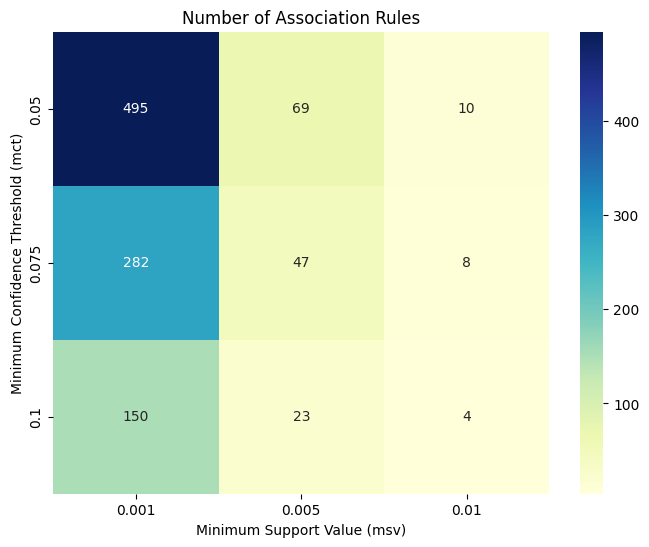

In [ ]:
msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.1]
results = {}

for msv in msv_values:
    frequent_itemsets = apriori(transaction_df, min_support=msv, use_colnames=True)
    for mct in mct_values:

        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct, num_itemsets=2)
        results[(msv, mct)] = len(rules)

heatmap_data = pd.DataFrame(
    [[results[(msv, mct)] for msv in msv_values] for mct in mct_values],
    index=mct_values,
    columns=msv_values
)


plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", xticklabels=msv_values, yticklabels=mct_values)
plt.title("Number of Association Rules")
plt.xlabel("Minimum Support Value (msv)")
plt.ylabel("Minimum Confidence Threshold (mct)")
plt.show()

2.a


Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and
validation accuracy - 2 curves)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7273 - loss: 0.5971 - val_accuracy: 0.9776 - val_loss: 0.0732
Epoch 2/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9793 - loss: 0.0660 - val_accuracy: 0.9851 - val_loss: 0.0489
Epoch 3/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9860 - loss: 0.0461 - val_accuracy: 0.9865 - val_loss: 0.0395
Epoch 4/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9877 - val_loss: 0.0403
Epoch 5/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9891 - val_loss: 0.0332
Epoch 6/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9922 - loss: 0.0290 - val_accuracy: 0.9895 - val_loss: 0.0307
Epoch 7/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9883 - val_loss: 0.0326
Epoch 8/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9927 - loss: 0.0246 - val

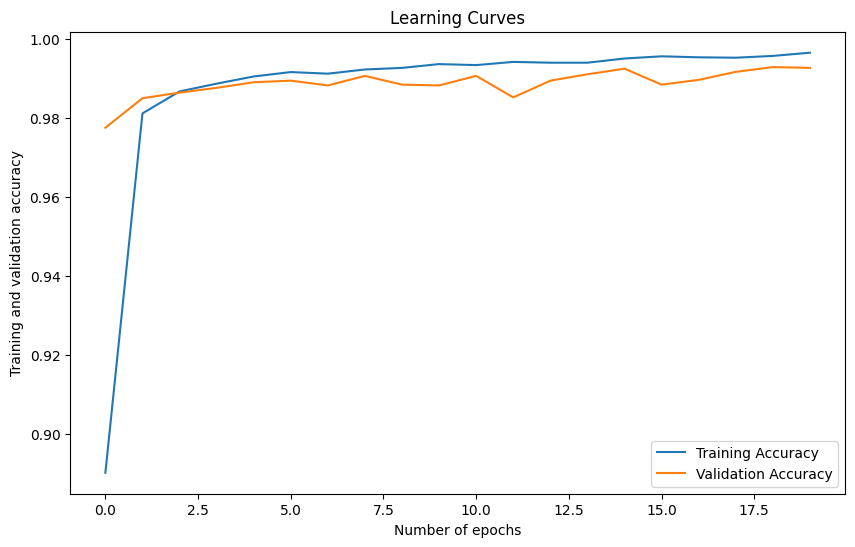

Test Accuracy: 1.00


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example dataset: Replace with your actual 4-class dataset
# Using MNIST digits for demonstration, assume classes are limited to 4
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, y_train = x_train[y_train < 4], y_train[y_train < 4]
x_test, y_test = x_test[y_test < 4], y_test[y_test < 4]

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

# Split training into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val), verbose=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves')
plt.xlabel('Number of epochs')
plt.ylabel('Training and validation accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


2.b my banner id is Banner Id:916494075 so i did (b)

Training with 8 filters in the 2nd layer
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8422 - loss: 0.5171 - val_accuracy: 0.9697 - val_loss: 0.1053
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9686 - loss: 0.1024 - val_accuracy: 0.9758 - val_loss: 0.0807
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.9769 - loss: 0.0727 - val_accuracy: 0.9809 - val_loss: 0.0648
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9837 - loss: 0.0532 - val_accuracy: 0.9833 - val_loss: 0.0570
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9854 - val_loss: 0.0503
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9806 - val_loss: 0.0695
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9873 - val_loss: 0.0465
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━

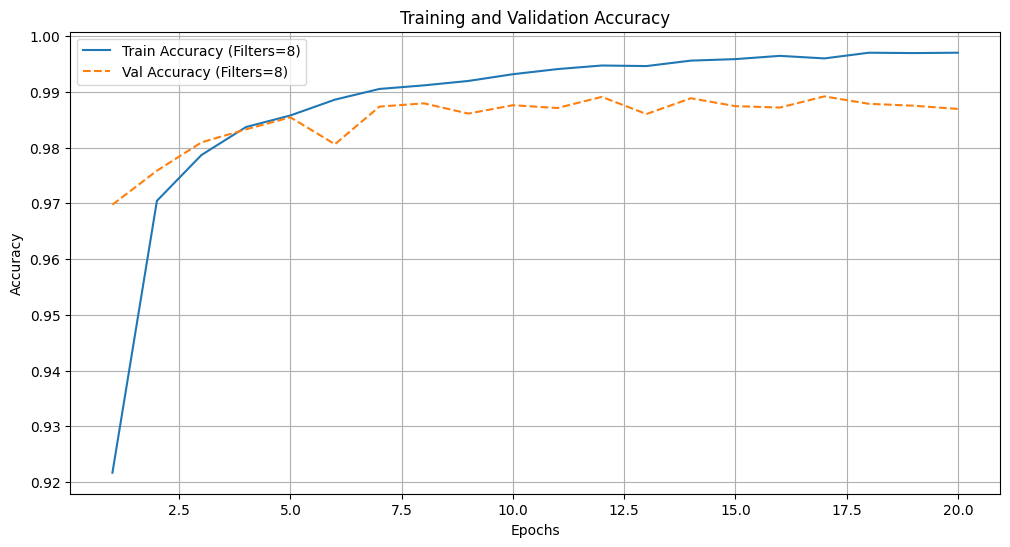

Test Accuracy: 0.99


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Function to create the model
def create_model(num_filters_second_layer):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(num_filters_second_layer, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot learning curves
def plot_learning_curves(history_dict, filter_values):
    plt.figure(figsize=(12, 6))

    for num_filters, history in history_dict.items():
        epochs = range(1, len(history['accuracy']) + 1)
        plt.plot(epochs, history['accuracy'], label=f'Train Accuracy (Filters={num_filters})')
        plt.plot(epochs, history['val_accuracy'], linestyle='--', label=f'Val Accuracy (Filters={num_filters})')

    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# List of filter values for the second convolutional layer
filters1 = [8]
filters2 = [16]

# Dictionary to store training history
history_dict = {}

# Train the model for each filter configuration
for num_filters in filters1:
    print(f"Training with {num_filters} filters in the 2nd layer")
    model = create_model(num_filters)
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)
    history_dict[num_filters] = history.history


# Plot the learning curves
plot_learning_curves(history_dict, filters1)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


Training with 16 filters in the 2nd layer
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8582 - loss: 0.4669 - val_accuracy: 0.9692 - val_loss: 0.0999
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9754 - loss: 0.0784 - val_accuracy: 0.9812 - val_loss: 0.0680
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9819 - loss: 0.0557 - val_accuracy: 0.9846 - val_loss: 0.0536
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9867 - loss: 0.0421 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9866 - val_loss: 0.0530
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.9917 - loss: 0.0265 - val_accuracy: 0.9843 - val_loss: 0.0585
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━

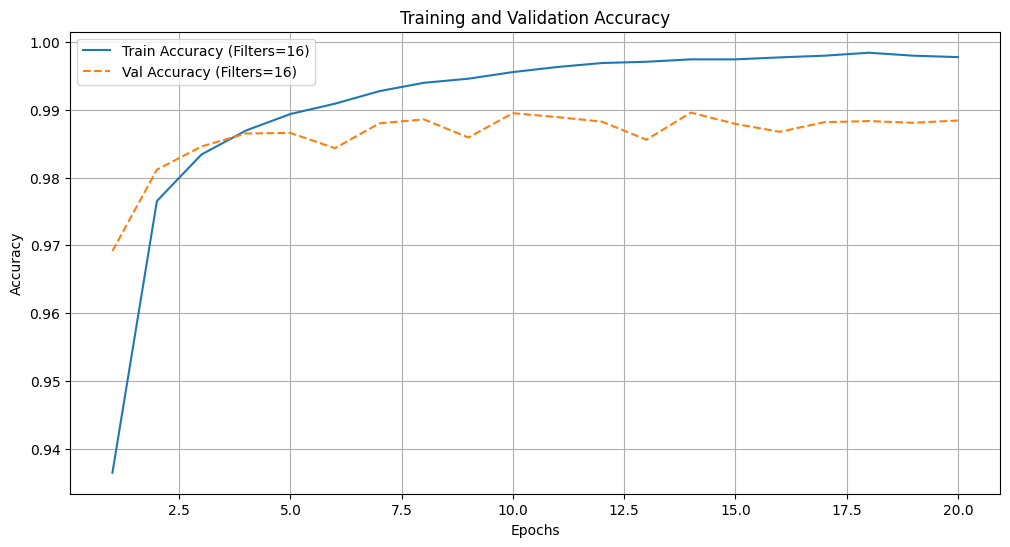

Test Accuracy: 0.99


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Function to create the model
def create_model(num_filters_second_layer):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(num_filters_second_layer, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot learning curves
def plot_learning_curves(history_dict, filter_values):
    plt.figure(figsize=(12, 6))

    for num_filters, history in history_dict.items():
        epochs = range(1, len(history['accuracy']) + 1)
        plt.plot(epochs, history['accuracy'], label=f'Train Accuracy (Filters={num_filters})')
        plt.plot(epochs, history['val_accuracy'], linestyle='--', label=f'Val Accuracy (Filters={num_filters})')

    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# List of filter values for the second convolutional layer

filters2 = [16]

# Dictionary to store training history
history_dict = {}



# Train the model for each filter configuration
for num_filters in filters2:
    print(f"Training with {num_filters} filters in the 2nd layer")
    model = create_model(num_filters)
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)
    history_dict[num_filters] = history.history

# Plot the learning curves
plot_learning_curves(history_dict, filters1)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")



The Base model with an accuracy of 1.00 is likely overfitting, as it indicates the model is too tightly fit to the training data. This could result in poor generalization to new, unseen data.

The Model with 8 fliters and model with 16 filters, with accuracies of 0.99, may be closer to the ideal balance between underfitting and overfitting. They appear to generalize better while maintaining high performance on the training data.

